In [80]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

In [2]:
segmentation_df = pd.read_csv('segmentation data.csv', index_col = 0)

In [3]:
segmentation_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
segmentation_df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## Pearson Correlation - linear dependency between variable 

In [5]:
segmentation_df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


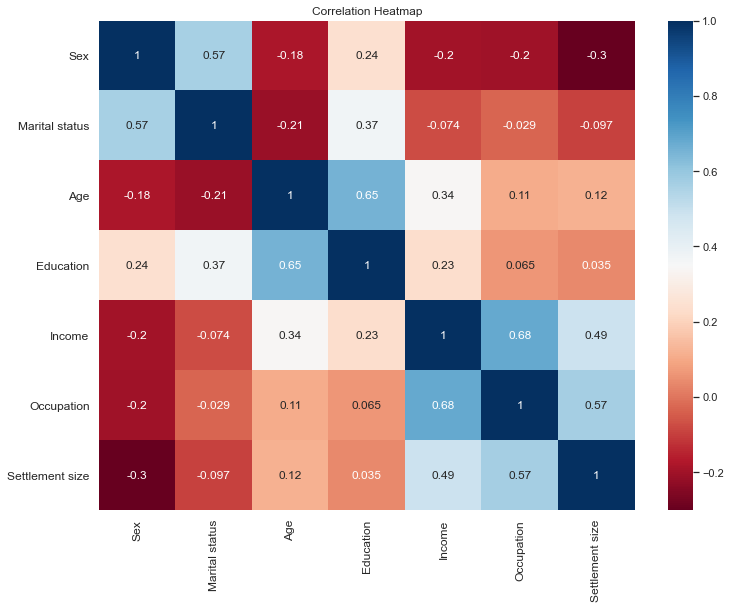

In [6]:
plt.figure(figsize=(12,9))
s = sns.heatmap(segmentation_df.corr(),
               annot=True,
               cmap="RdBu")
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title("Correlation Heatmap")
plt.show()

## Visualize Raw data

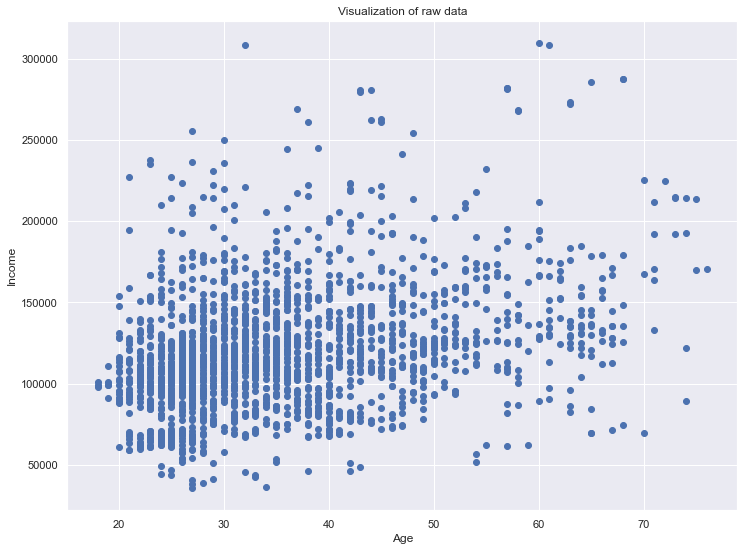

In [7]:
plt.figure(figsize = (12,9))
plt.scatter(segmentation_df.iloc[:,2], segmentation_df.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')
plt.show()

## Standardization

In [8]:
scaler = StandardScaler()
segm_std = scaler.fit_transform(segmentation_df)

## Hierarchical Clustering

In [9]:
heir_cluster = linkage(segm_std, method="ward")

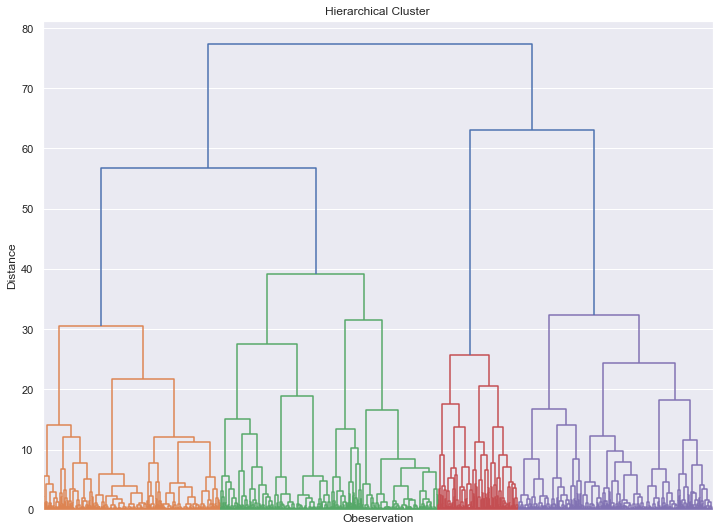

In [10]:
plt.figure(figsize=(12,9))
plt.title("Hierarchical Cluster")
plt.xlabel("Obeservation")
plt.ylabel("Distance")
dendrogram(heir_cluster,
          show_leaf_counts=False,
          no_labels=True
          )
plt.show()

## KMeans

In [11]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 24)
    kmeans.fit(segm_std)
    wcss.append(kmeans.inertia_)

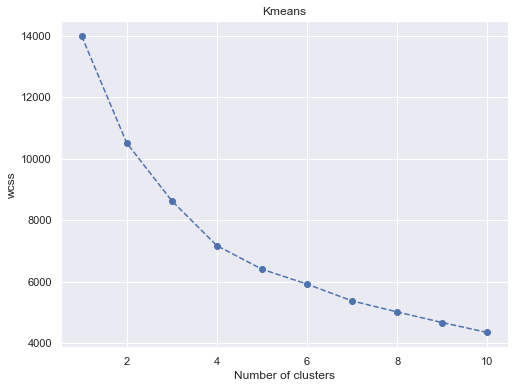

In [12]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.title("Kmeans")
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 4, random_state=24)

In [14]:
kmeans.fit(segm_std)

KMeans(n_clusters=4, random_state=24)

## Results

In [15]:
df_seg_kmeans = segmentation_df.copy()
df_seg_kmeans['Segment Kmeans'] = kmeans.labels_

In [16]:
seg_kmeans_analysis = df_seg_kmeans.groupby(['Segment Kmeans']).mean()
seg_kmeans_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment Kmeans,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
1,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290


In [17]:
seg_kmeans_analysis['N obs'] = df_seg_kmeans[['Segment Kmeans', 'Sex']].groupby(['Segment Kmeans']).count()

In [18]:
seg_kmeans_analysis['Porp Obs'] = seg_kmeans_analysis['N obs']/seg_kmeans_analysis['N obs'].sum() 

In [19]:
seg_kmeans_analysis.rename({
    0 : "standard",
    1 : "well-off",
    2 : "career-focused",
    3 : "fewer-opportunities"
})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N obs,Porp Obs
Segment Kmeans,,,,,,,,,
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
career-focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310


In [20]:
df_seg_kmeans['Lables'] = df_seg_kmeans['Segment Kmeans'].map({
    0 : "standard",
    1 : "well-off",
    2 : "career-focused",
    3 : "fewer-opportunities"
})

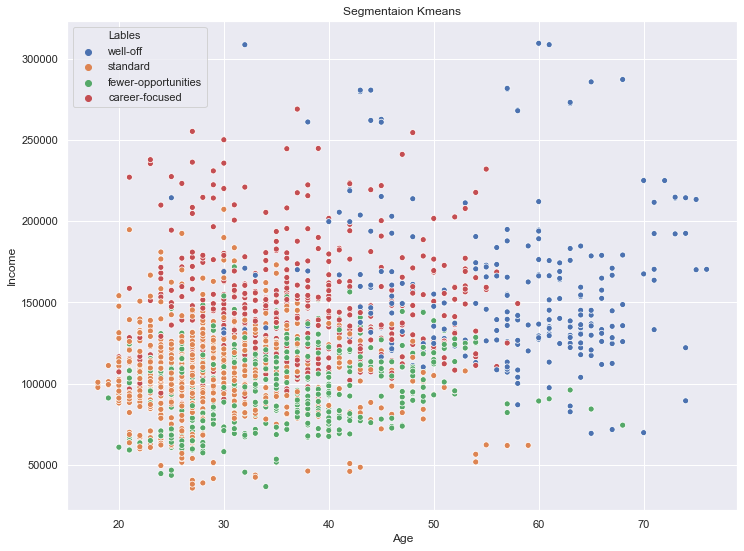

In [21]:
x_axis = df_seg_kmeans['Age']
y_axis = df_seg_kmeans['Income']
plt.figure(figsize=(12,9))
sns.scatterplot(x_axis, y_axis, hue = df_seg_kmeans['Lables'], cmap='rainbow')
plt.title("Segmentaion Kmeans")
plt.show()

## PCA

In [23]:
pca = PCA()

In [25]:
pca.fit(segm_std)

PCA()

In [26]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

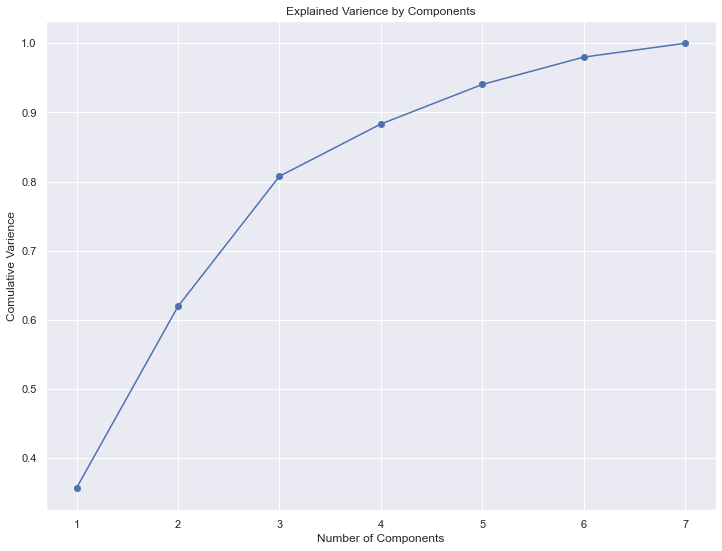

In [30]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Explained Varience by Components")
plt.xlabel("Number of Components")
plt.ylabel("Comulative Varience")
plt.show()

In [31]:
pca = PCA(n_components=4)

In [32]:
pca.fit(segm_std)

PCA(n_components=4)

## PCA result

In [34]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503],
       [-0.31560091,  0.28045392, -0.00950602,  0.18147643, -0.48260023,
        -0.28169039,  0.69026455]])

In [39]:
df_pca_compo = pd.DataFrame(data = pca.components_,
                           columns = segmentation_df.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4'])
df_pca_compo

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685
Component 4,-0.315601,0.280454,-0.009506,0.181476,-0.482600,-0.281690,0.690265


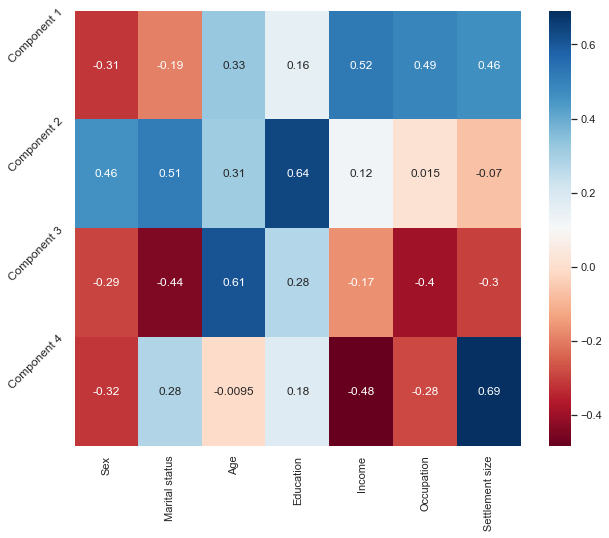

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(df_pca_compo, 
            cmap='RdBu',
            annot=True)
plt.yticks([0,1,2,3], 
           ['Component 1', 'Component 2', 'Component 3', 'Component 4'],
           rotation = 45, fontsize = 12)
plt.show()

In [48]:
pca.transform(segm_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ,  1.21779432],
       [ 0.34493528,  0.59814564, -2.21160279,  0.54838542],
       [-0.65106267, -0.68009318,  2.2804186 ,  0.12067518],
       ...,
       [-1.45229829, -2.23593665,  0.89657125, -0.13177412],
       [-2.24145254,  0.62710847, -0.53045631, -0.04260559],
       [-1.86688505, -2.45467234,  0.66262172,  0.10089556]])

In [49]:
scores_pca = pca.transform(segm_std)

## KMeans clustering with PCA

In [50]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, random_state = 24)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

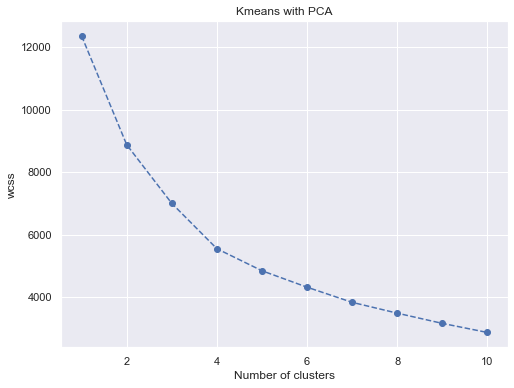

In [51]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.title("Kmeans with PCA")
plt.show()

In [52]:
kmeans_pca = KMeans(n_clusters=4, random_state=24)

In [53]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=24)

## KMeans with PCA results

In [60]:
df_segm_pca_kmeans = pd.concat([segmentation_df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-4:] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
df_segm_pca_kmeans['Segment Kmeans PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4,Segment Kmeans PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,1.217794,1
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0.548385,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0.120675,3
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,-0.510753,2
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,-0.231808,2


In [58]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment Kmeans PCA']).mean()
df_segm_pca_kmeans_freq.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4
Segment Kmeans PCA,,,,,,,,,,,
0,0.904762,0.988095,28.845238,1.062500,107572.654762,0.672619,0.440476,-1.122852,0.732255,-0.801897,-0.018111
1,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,0.093934
2,0.026178,0.178010,35.624782,0.734729,140950.319372,1.267016,1.520070,1.381089,-1.044848,-0.273292,0.211736
3,0.320408,0.089796,35.236735,0.769388,95878.406122,0.297959,0.038776,-0.987651,-0.880909,0.962858,-0.273564


In [63]:
df_segm_pca_kmeans_freq['N obs'] = df_segm_pca_kmeans[['Segment Kmeans PCA', 'Sex']].groupby(['Segment Kmeans PCA']).count()
df_segm_pca_kmeans_freq['Porp Obs'] = df_segm_pca_kmeans_freq['N obs']/df_segm_pca_kmeans_freq['N obs'].sum() 

In [65]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({
    0 : "standard",
    1 : "well-off",
    2 : "career-focused",
    3 : "fewer-opportunities"
})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4,N obs,Porp Obs
Segment Kmeans PCA,,,,,,,,,,,,,
standard,0.904762,0.988095,28.845238,1.062500,107572.654762,0.672619,0.440476,-1.122852,0.732255,-0.801897,-0.018111,672,0.3360
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,0.093934,265,0.1325
career-focused,0.026178,0.178010,35.624782,0.734729,140950.319372,1.267016,1.520070,1.381089,-1.044848,-0.273292,0.211736,573,0.2865
fewer-opportunities,0.320408,0.089796,35.236735,0.769388,95878.406122,0.297959,0.038776,-0.987651,-0.880909,0.962858,-0.273564,490,0.2450


In [74]:
df_segm_pca_kmeans['Labels'] = df_segm_pca_kmeans['Segment Kmeans PCA'].map({
    0 : "standard",
    1 : "well-off",
    2 : "career-focused",
    3 : "fewer-opportunities"
})

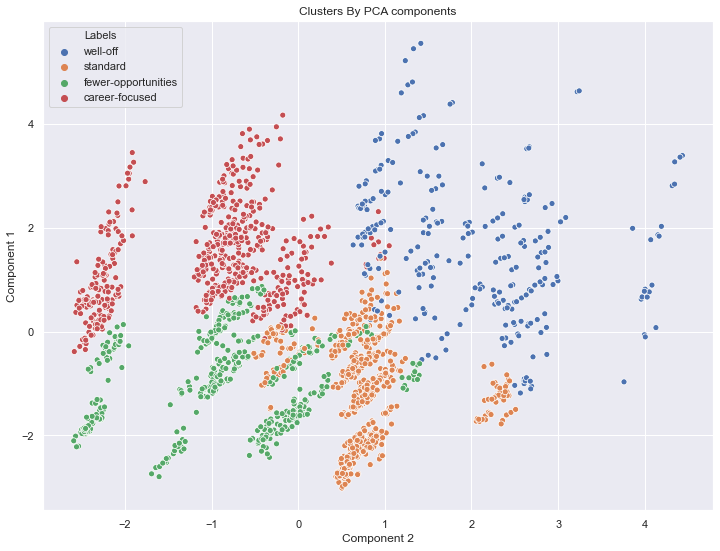

In [78]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(12,9))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Labels'], cmap='rainbow')
plt.title("Clusters By PCA components")
plt.show()

## Data Export

In [82]:
pickle.dump(scaler, open("scaler.pickle", 'wb'))

In [83]:
pickle.dump(pca, open("pca.pickle", 'wb'))

In [84]:
pickle.dump(kmeans_pca, open("kmeans_pca.pickle", 'wb'))